# Part II - Prosper Loan Dataset Explanatory Visualization
## by Ayomide Joseph Adeigbe

## Investigation Overview
> In this investigation, I wanted to establish the economic viability of the loan by predicting the exact feature or sets of features that directly influence the interest rate paid on the principal. For example what feature will guarantee or influence a person high or low interest rate.
My hypothesis is that people with low interest rate, affordable loan amount, and high credit scores will likely pay their debt timely. A negation in any of the listed variables might affect a persons ability to honor obligations.

> Key insights includes the relationship between customer ratings and loan amount they can secure, loan status analysis revealing significant numberof defaulted/chargedoff loans, and income range distribution of debtors.


## Dataset Overview

> The dataset has 113,937 loan entries for people across different states, occupation and income range. 81 variables were measured on each loan including loan amount, interest rate, debt to income ratio, and many more.

In [13]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [15]:
# load in the dataset into a pandas dataframe
loan_df = pd.read_csv('../prosperLoanData.csv', encoding='ISO-8859-1')

# convert IncomeRange, ProsperScore, ProsperRating (numeric), and ProsperRating (Alpha) into ordered categorical types
ordinal_loan_var_dict = {'IncomeRange': ['$100,000+','$75,000-99,999','$50,000-74,999','$25,000-49,999','$1-24,999','$0','Not employed'],
                    'LoanStatus': ['Current','Completed', 'FinalPaymentInProgress','Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)','Cancelled','Chargedoff','Defaulted'],
                    'ProsperScore': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ],
                    'ProsperRating (numeric)': [7, 6, 5, 4, 3, 2, 1],
                    'ProsperRating (Alpha)': ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']}

for feature in ordinal_loan_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_loan_var_dict[feature])
    loan_df[feature] = loan_df[feature].astype(ordered_var)

## Prosper Loan General Status

> I observed that majority of Prosper loans are currently running and being serviced appropriately but significant percentage of the loans are also chargedoff and defaulted - 14.9% of booked loans have gone bad.



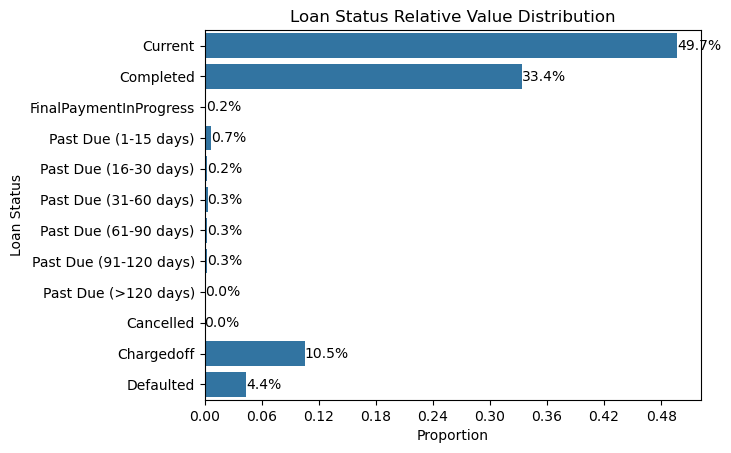

In [16]:
total_loans = loan_df.shape[0]
max_loanstatus_count = loan_df['LoanStatus'].value_counts()[0]
max_loanstatus_prop = max_loanstatus_count / total_loans
max_loanstatus_prop
sns.countplot(data = loan_df, y = 'LoanStatus', color = plot_color).set(title='Loan Status Relative Value Distribution', ylabel='Loan Status');
props = np.arange(0, max_loanstatus_prop, 0.06)
labels = ['{:0.2f}'.format(v) for v in props]
plt.xticks(props * total_loans, labels)
plt.xlabel('Proportion')


def relative_value_plot(column_name):
    #compute and plot relative value of chart
    loan_status_count = loan_df[column_name].value_counts(sort=False)
    for i in range(loan_status_count.shape[0]):
        count = loan_status_count[i]
        loan_pct = '{:0.1f}%'.format(100*count/total_loans)
        plt.text(count+1, i, loan_pct, va = 'center');
relative_value_plot('LoanStatus')

## Income Range Distribution

> More than 50% of booked loans went to middle income earners when related to income range defined in the dataset and most of them received loans less than USD10,000 at a relatively high interest rate. Few unemployed customers and some without declared income also managed to secure some loan facilities with Prosper.

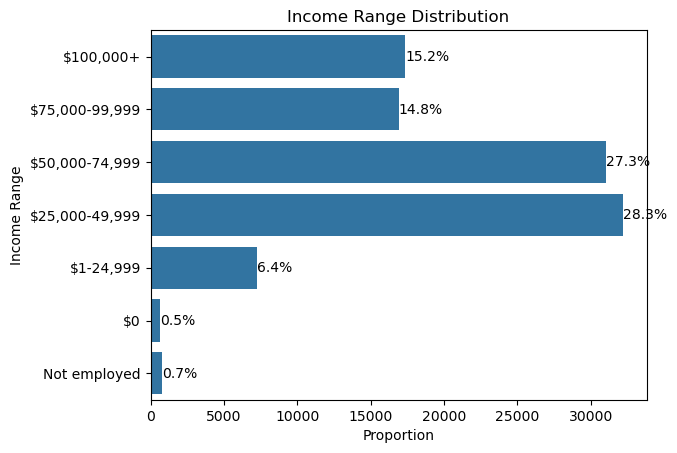

In [19]:
#Bar chart showing Income distribution of the dataset
plot_color = sns.color_palette()[0]
income_range_order = loan_df['IncomeRange'].value_counts().index
sns.countplot(data = loan_df, y = 'IncomeRange', color = plot_color).set(title='Income Range Distribution');
plt.ylabel('Income Range')
plt.xlabel('Proportion')
relative_value_plot('IncomeRange')

## Who gets the most money at the best interest rate

> There is direct relationship between interest rate, customer rating and loan amount.It is observed that higher interest rates are common with lower loan amount - which means low income earners or "poor people" tend to pay more interest since they can not secure higher amounts when compared to relatively rich people.
Majority of people that enjoyed low interest rate and can obtain high loan amount have Prosper rating of either AA, A, or B which are the top 3 ratings available to customers.

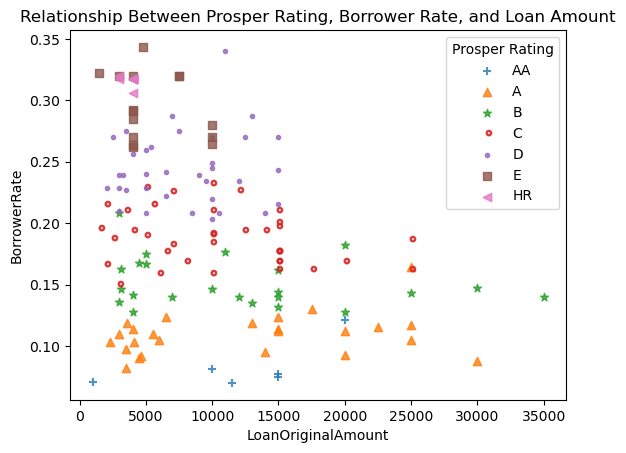

In [20]:

np.random.seed(2023)
get_sample = np.random.choice(loan_df.shape[0], 200, replace=False)
loan_df_subset = loan_df.loc[get_sample]
marker_types=[['AA','+'], ['A', '^'], ['B','*'], ['C','$\circ$'], ['D','.'], ['E',','], ['HR','<']]
for category, mark in marker_types:
    current_data= loan_df_subset.loc[loan_df_subset['ProsperRating (Alpha)'] == category]
    sns.regplot(data=current_data, y='BorrowerRate', x='LoanOriginalAmount', fit_reg = False, marker=mark)
plt.title('Relationship Between Prosper Rating, Borrower Rate, and Loan Amount')
plt.legend(['AA','A','B','C','D','E','HR'], title='Prosper Rating');

In [21]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 745436 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\HiHo\anaconda3\envs\ALX\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\HiHo\anaconda3\envs\ALX\lib\site-packages\jupyter_core\application.py", line 277, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\HiHo\anaconda3\envs\ALX\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\HiHo\anaconda3\envs\ALX\lib\site-packages\nbconvert\nbconvertapp.py", line 423, in start
    self.convert_notebooks()
  File "C:\Users\HiHo\anaconda3\envs\ALX\lib\site-packages\nbconvert\nbconvertapp.py", line 597, in convert_notebooks
    self.convert_